In [1]:
import os
import random

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

from modules.predict import predict
from helpers.plot import *

config = Cfg.load_config_from_name('vgg_transformer')
config['cnn']['pretrained'] = False
config['device'] = 'cpu'
detector = Predictor(config)

d:\AppData\miniconda3\envs\ocr\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\dinhd\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


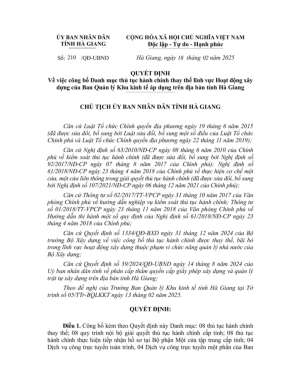

In [9]:
files = os.listdir("./data")
file = random.choice(files)
img = cv2.imread(f"./data/{file}")

display_img(img)

In [10]:
prediction, process_time = predict(
    file_path = os.path.join("./data", file),
    detector = detector
)

prediction

['ỦY BAN NHÂN DÂN\nGIANG\nCONTRACTIONALISTS\n',
 'CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc do\nE E\n',
 'Số: 210 /QĐ-UBND\n',
 'Hà Giang, ngày 18 tháng 02 năm 2025\n',
 'QUYẾT PINH\nVề việc công bố Danh mục thủ tục hành thay thế lĩnh VỰC Hoạt động xây\ndựng của Ban Quản lý Khu sau kinh tế áp dụng trị kinh tế trên địa bàn tỉnh Hà Giang\n',
 'CHỦ TỊCH ỦY BAN NHÂN DÂN TỈNH HÀ GIANG\n']

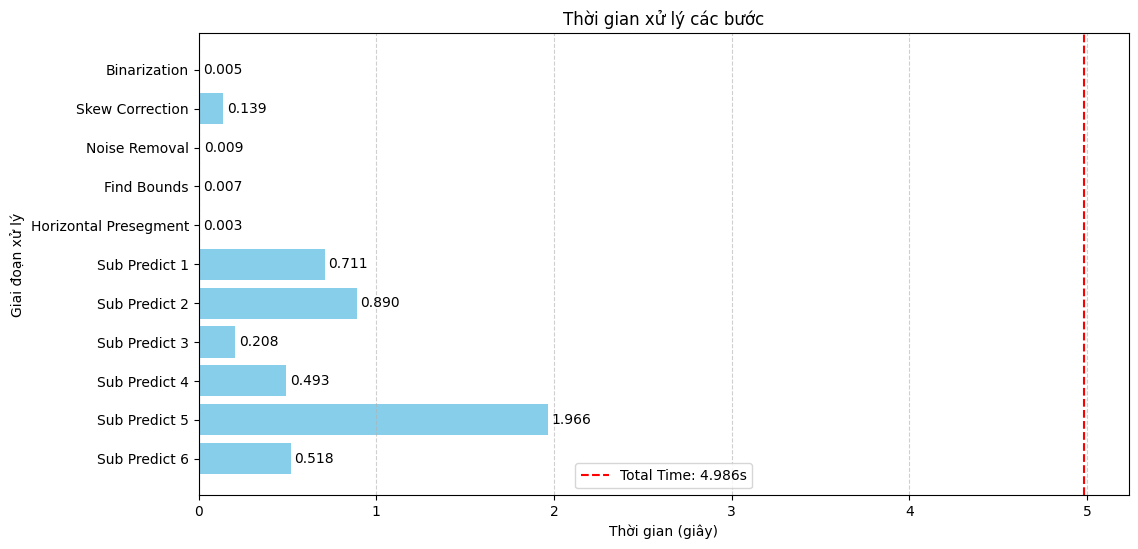

In [11]:
def visualize_time(data):
    # Lấy dữ liệu từ input
    preprocessing = data['preprocessing']['preprocessing_parts']
    prediction = data['predict_parts']
    
    # Gom nhóm các phần dữ liệu
    preprocessing_data = {
        'Binarization': preprocessing['binarization'],
        'Skew Correction': preprocessing['skew_correction'],
        'Noise Removal': preprocessing['noise_removal'],
        'Find Bounds': preprocessing['find_bounds'],
        'Horizontal Presegment': preprocessing['segmentation_total']
    }
    
    prediction_data = {
        f'Sub Predict {i+1}': time for i, time in enumerate(prediction['sub_predict'])
    }
    
    total_time = data['predict_total']
    
    # Chuẩn bị dữ liệu để vẽ
    labels = list(preprocessing_data.keys()) + list(prediction_data.keys())
    values = list(preprocessing_data.values()) + list(prediction_data.values())
    
    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    plt.barh(labels, values, color="skyblue")
    plt.axvline(total_time, color='red', linestyle='--', label=f'Total Time: {total_time:.3f}s')
    
    plt.xlabel("Thời gian (giây)")
    plt.ylabel("Giai đoạn xử lý")
    plt.title("Thời gian xử lý các bước")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.legend()
    
    # Hiển thị giá trị trên thanh
    for index, value in enumerate(values):
        plt.text(value + 0.02, index, f"{value:.3f}", va="center")
    
    plt.show()

visualize_time(process_time)